

# Logistic Regression

working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

* QUICK NOTE on Kaggle: all the Kaggle competitions come with 2 datasets. One is called train and the other test. The idea is that we use train to make our models (and split again train in another train and test) and then you submit the result of your model for the competition using their test dataset. (their test dataset is without the target labels)

In [2]:
data = pd.read_csv('data/titanic_train.csv')


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 1 Exploratory Data Analysis EDA

* Today we are introducing more methods that we can use to prepare our data for machine learning
* Missing data
* data cleaning
* categorical features

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data

In [11]:
data.isnull().astype(int).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

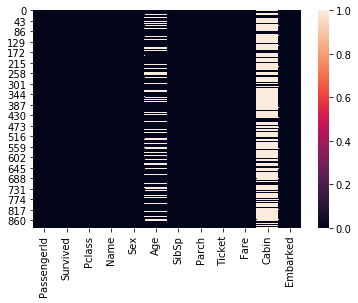

In [9]:
sns.heatmap( data.isnull().astype(int) )

Roughly 20 percent of the Age data is missing. The proportion of Age missing is small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. 
Let's continue on by visualizing some more of the data!

In [12]:
# Examine if our dataset is balanced or unbalanced using the method value_counts() from pandas
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

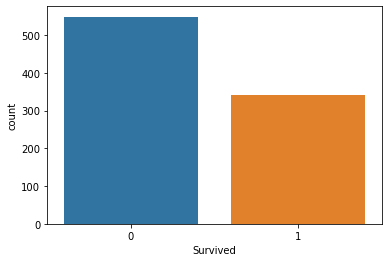

In [13]:
# plot the same information in a graph
sns.countplot(data['Survived'])

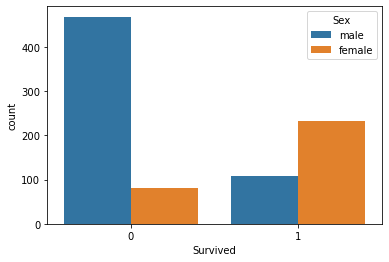

In [14]:
# plot the same information but adding the hue parameter
sns.countplot(x=data['Survived'],hue=data['Sex'])
# women survived more in percentage

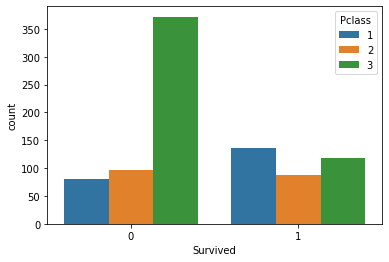

In [15]:
# plot the same information but adding the hue parameter
sns.countplot(x=data['Survived'],hue=data['Pclass'])


* it seems that males and people in the third class were the majority who did not survive

### YOUR TURN
<font color='red'>try a different count plot as above but with different column for the hue value.</font>

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

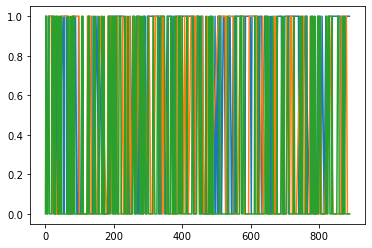

In [17]:
# try a different count plot as above but with different column for the hue value.

data['Survived'].groupby(data['Pclass']).plot()

#sns.countplot(x=data['Survived'],hue=data['Age'])





## Data Cleaning
* We want to fill in missing age data instead of just dropping the missing age data rows.
* One way to do this is by filling in the mean age of all the passengers (imputation).
* However we can be smarter about this and check the average age by passenger class. For example:


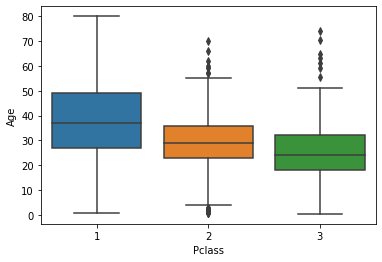

In [18]:
sns.boxplot(x=data['Pclass'],y=data['Age'])

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables. The box shows the quartiles of the dataset  (circa 50% of distribution) while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

Python <font color='red'>Using Function</font> example

In [22]:
# definition of the function
    
def myfunc(q,m):
    '''this is my function that multiplies input q by m
        input: q
        output: q*m
    '''
    myout = q * m
    return myout

# calling the function and store the return of the function in a variable
result = myfunc(10,2)

# print the result varible
result

20

In [23]:

def our_custom_function_impute_age(cols):
    '''
    input: cols -- 2 column matrix, [Age, Pclass]
    output: age --
    
    this function that we build return a value in consideration 
     of the class of the passenger
    '''
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

In [24]:
data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [30]:
our_custom_function_impute_age( [None,2] )

29

To apply a function to each cell in pandas we can use the .apply method (function to be called without the brackets and the axis in this case the column axis

In [35]:
data['Age'] = data[ ['Age','Pclass'] ].apply( our_custom_function_impute_age, axis=1 ) 

Check the missing value again

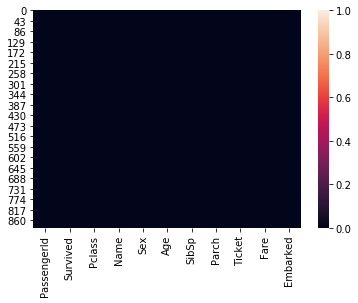

In [39]:
sns.heatmap(data.isnull().astype(int))

There are too many missing values in the cabin column so we drop it

In [37]:
data.drop('Cabin',axis=1,inplace=True) # implace means remember and change the original dataset

In [42]:
# have a look again
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


* we still have 2 missing values for Embarked

In [41]:
# now we can drop all the nan values 
# the embarked missing value
data.dropna(inplace=True) # by default it considers the rows

## Converting Categorical Features 


In [44]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [56]:
# we collect the dummy variable and drop the first to have only the encoded that we need
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [49]:
sex.head(10)
# previously we had one column and values Q,C,S now we have 2 columns and value (0,1) for S , (1,0) for Q and (0,0) for C

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [55]:
embark.head(10)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


since we created the new columns we need to delete the previous one or we will have unecessary data
* also we do not need Name or Ticket - those are not useful for prediction

In [57]:
data.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'],axis=1,inplace=True) # inplace makes sure that the original dataset is updated

#### concatenate the database by adding the dummies columns

* we still have to add the dummy columns that we created
* we can do so by using the concat method in pandas

In [58]:
# we concatenate to the original dataframe
data = pd.concat([data,sex,embark],axis=1)

In [59]:
# see with don't have the sex and embarked features anymore but the dummies ( - 1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1




# Building a Logistic Regression model
 

## Train Test Split

In [60]:
from sklearn.model_selection import train_test_split

* the dataset is a bit unbalanced so we will split using stratification from scikit learn

In [61]:
x = data.drop('Survived',axis=1) # shortcut to get the X 
y = data['Survived']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x,y, stratify=data['Survived'])

In [63]:
y_train.value_counts() # we can see that we kept the same distribution

0    411
1    255
Name: Survived, dtype: int64

## make the model in scikit learn

In [64]:
# import the library
from sklearn.linear_model import LogisticRegression

#### create the model and fit

In [65]:
logmodel = LogisticRegression()

* fit the model

In [66]:
logmodel.fit(X_train,y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()


# Store the predictions

In [67]:
predictions = logmodel.predict(X_test)

## Evaluation

In [68]:
# calculate accuracy
logmodel.score(X_train, y_train)

0.8108108108108109

In [69]:
logmodel.score(X_test,y_test) # notice that is pretty much what we did in the previous lessons

0.7802690582959642

For binary classification, we often speak of a positive  class and a negative  class, with the understanding that the positive class is the one we are looking for.

Often, accuracy is not a good measure of predictive performance, as the number of mistakes we make does not contain all the information we are interested in. Imagine an application to screen for the early detection of cancer using an automated test. If the test is negative, the patient will be assumed healthy, while if the test is positive, the patient will undergo additional screening. Here, we would call a positive test (an indication of cancer) the positive class, and a negative test the negative class. We can’t assume that our model will always work perfectly, and it will make mistakes. For any application, we need to ask ourselves what the consequences of these mistakes might be in the real world. 

* One possible mistake is that a healthy patient will be classified as positive, leading to additional testing. This leads to some costs and an inconvenience for the patient (and possibly some mental distress). An incorrect positive prediction is called a false positive. 

* The other possible mistake is that a sick patient will be classified as negative, and will not receive further tests and treatment. The undiagnosed cancer might lead to serious health issues, and could even be fatal.  A mistake of this kind—an incorrect negative prediction is called a false negative.

* imbalanced targets can lead to high accuracy value but with a bad model. Image a dataset with 99% of class 1 and 1% of class 0. without creating any machine learning algorithm and predicting 1 for each example we are given we can get 99% of accuracy for free.

### confusion metrics
One of the most comprehensive ways to represent the result of evaluating binary classification is using confusion matrices.
The output of confusion_matrix  is a table, where the rows correspond to the true classes and the columns correspond to the predicted classes. Each entry counts how often a sample that belongs to the class corresponding to the row  was classified as the class corresponding to the column. 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
df = pd.DataFrame(confusion_matrix(y_test, predictions),index=['Gnd0','Gnd1'],columns=['Pred0', 'Pred1'] )
sns.heatmap(df)

### classification report


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

    * Precision = TP / (TP+FP) proportion of prediction are correct
    * Recall = TP / (TP + FN) proportion of actual positives are correct
    * F1 = 2 * (precision - recall) / (precision + recall) takes into account both recall and precision
    

**Classification Threshold**

* this is the output of our prediction

In [ ]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
logmodel.predict(X_test)[0:10]

* but we can also print the probability before the prediction (remember the sigmoid function)

In [ ]:
# print the first 10 predicted probabilities of class membership
logmodel.predict_proba(X_test)[0:10]

Observations:

1. In each row the numbers sum up to 1
2. There are 2 columns for 2 classes ('Outcome' = 0 and 'Outcome' = 1)
  - column 0: predicted probability that each observation is a member of class 0
  - column 1: predicted probability that each observation is a member of class 1
3. Choose the class with the highest probability (classification threshold = 0.5)
  - Class 1 is predicted if probability > 0.5
  - Class 0 is predicted if probability < 0.5

In [ ]:
# histogram of predicted probabilities

save_predictions_proba = logmodel.predict_proba(X_test)[:, 1]  # column 1

* plot the results

In [ ]:
plt.hist(save_predictions_proba, bins=10)

plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Survived')
plt.ylabel('Frequency')
plt.show()

a relative small number of observations with probability > 0.5, most observations have a probability < 0.5 and would be predicted "survived" in our case. We can increase the sensitivity (increase number of TP) of the classifier by decreasing the threshold for predicting survived.

In [ ]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize

# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
prediction2 = binarize(save_predictions_proba.reshape(-1, 1), 0.5)  # [0]


# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test, prediction2)
confusion_matrix2


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction2))

* we can check the result of the report wiht our previous report

Observations: 

- Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be adjusted to increase sensitivity
- Sensitivity and specificity (the other recall for simplicity) have an inverse relationship (Increasing one would always decrease the other)
- Adjusting the threshold should be one of the last steps you do in the model-building process